In [85]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from statistics import median

# Importing datasets

In [86]:
genderpaygap = pd.read_csv('Means_Gender_pay_gap_2015_csv.csv')
reviews=pd.read_csv('glassdoor_reviews.csv')

In [87]:
#Checking the data type
datatype = genderpaygap.dtypes
datatype

Description             object
Code                   float64
Gender pay gap mean     object
Color code               int64
dtype: object

# Cleaning and filtering the data

## Gender pay gap dataset 

In [88]:
# In the dataset provided by the Office for National Statistics in the UK, the data is color coded in terms of its quality. 
# By importing the data, I gave a number to each color. 
# Legend: 1: Estimates are considered good quality; 2: Estimates are considered reasonable quality;
#         3: Estimates are considered lower quality ; 4: x = Estimates are considered unreliable for practical purposes or are unavailable
# • If the CV values of both the male and female earnings estimates are less than or equal to 5% then the GPG estimate is considered good quality.
# • If the CV value of either (or both) the male or female earnings estimate is greater than 5% and less than or equal to 10% (and the CV of the other estimate is less than or equal to 10%) then the GPG estimate is considered reasonable quality.
# • If the CV value of either (or both) the male or female earnings estimate is greater than 10% and less than or equal to 20% (and the CV of the other estimate is less than or equal to 20%) then the GPG estimate is considered lower quality and should be used with caution.
# • If the CV value of at least one of the earnings estimates is greater than 20% then the GPG estimate is considered unreliable for practical purposes and is suppressed.                                                                         


genderpaygap = means_genderpaygap[(means_genderpaygap['Color code'] <= 2)]
genderpaygap

,Description,Code,Gender pay gap mean,Color code
59,"Managers, directors and senior officials",1.0,23.1,1
61,Professional occupations,2.0,13.6,1
62,Associate professional and technical occupations,3.0,15.6,1
63,Administrative and secretarial occupations,4.0,9.9,1
64,Skilled trades occupations,5.0,23.2,1
...,...,...,...,...
486,Waiters and waitresses,9273.0,1.5,1
487,Bar staff,9274.0,2.8,1
488,Leisure and theme park attendants,9275.0,1.9,1
489,Other elementary services occupations n....,9279.0,6,1


In [89]:
# Converting Gender pay gap mean column to numeric
genderpaygap['Gender pay gap mean'] = genderpaygap['Gender pay gap mean'].apply(pd.to_numeric)

#Filtering out only the sectors of the jobs listed
genderpaygap_sector = genderpaygap[ (genderpaygap['Code'] <= 9) ]

#Sorting gender pay gap means
genderpaygap_sector = genderpaygap_sector.sort_values(by='Gender pay gap mean', ascending=False)
genderpaygap_sector

C:\Users\Kat\AppData\Local\Temp\ipykernel_28496\848569198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genderpaygap['Gender pay gap mean'] = genderpaygap['Gender pay gap mean'].apply(pd.to_numeric)


,Description,Code,Gender pay gap mean,Color code
64,Skilled trades occupations,5.0,23.2,1
59,"Managers, directors and senior officials",1.0,23.1,1
67,"Process, plant and machine operatives",8.0,18.5,1
62,Associate professional and technical occupations,3.0,15.6,1
68,Elementary occupations,9.0,14.4,1
61,Professional occupations,2.0,13.6,1
63,Administrative and secretarial occupations,4.0,9.9,1
65,"Caring, leisure and other service occupations",6.0,8.6,1
66,Sales and customer service occupations,7.0,7.9,1


## Glassdoor reviews dataset 

In [90]:
print(reviews.dtypes)

firm                    object
date_review              int64
job_title               object
current                 object
location                object
overall_rating           int64
work_life_balance      float64
culture_values         float64
diversity_inclusion    float64
career_opp             float64
comp_benefits          float64
senior_mgmt            float64
recommend               object
ceo_approv              object
outlook                 object
headline                object
pros                    object
cons                    object
dtype: object


In [91]:
#Removing the blank spaces in the job_title column
reviews['job_title']= reviews['job_title'].str.strip()

In [92]:
#Filtering the dataset to select only Skilled trade occupations

skilled_trade= genderpaygap[genderpaygap['Code'].between(5000,5999) ]['Description'].str.strip()
description_skilled = skilled_trade.values.tolist()
description_skilled = ' and '.join(description_skilled ).split('s and ')

for i in range(len(description_skilled)):
    description_skilled[i] = description_skilled[i].title()

filtered_trade= reviews[reviews['job_title'].isin(description_skilled)]
filtered_trade

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
1349,ASDA,41786,Butcher,"Former Employee, more than 3 years","Glasgow, Scotland, Scotland",5,5.0,5.0,NaN,5.0,5.0,5.0,v,v,r,Loved it !!,working with brilliant people I gained an exce...,I cant think of any ........................ m...
1377,ASDA,41792,Baker,"Current Employee, more than 5 years","Stockport, England, England",3,3.0,3.0,NaN,4.0,4.0,3.0,v,v,v,"6 years, got to be doing something right !","the best thing about ASDA is... colleagues , a...",management .. the main problem is that people...
2966,ASDA,43228,Baker,"Current Employee, more than 5 years",Chennai,3,5.0,3.0,NaN,4.0,2.0,1.0,x,r,x,Baker,Reasonable pay increase above the shop floor c...,cuts and poorly trained management
3063,ASDA,43314,Baker,"Current Employee, more than 10 years","Edinburgh, Scotland, Scotland",4,3.0,3.0,NaN,3.0,3.0,2.0,x,x,r,Baker,"Shift allowance, flexible, discount card",Ever decreasing contract base hours
3439,ASDA,43539,Baker,"Current Employee, more than 5 years","Dagenham, England, England",3,4.0,1.0,NaN,3.0,3.0,2.0,o,o,o,baker,"flexable, good rate of pay","no appreciation, no equal with regards to work..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826764,Whitbread,43854,Chef,"Current Employee, less than 1 year","King's Lynn, England, England",5,3.0,4.0,NaN,5.0,4.0,4.0,v,r,v,Whitbread chefs,The best part of being a chef within Whitbread...,The biggest downside is the hours can be unpre...
826791,Whitbread,44037,Chef,"Former Employee, less than 1 year","Exeter, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,r,x,Awful,There is none. Everyone is rude or on drugs,"Overworked, underpaid blamed for everyone else..."
826813,Whitbread,44108,Chef,"Former Employee, more than 3 years","Telford, England, England",3,3.0,3.0,4.0,3.0,4.0,2.0,v,r,r,Grill Chef,Good pay \r\nGood benefits\r\nFlexible Shifts,Toxic managers\r\nYou can't leave work at work...
826900,Whitbread,44287,Chef,"Former Employee, more than 1 year","Warrington, North West England, England, England",5,3.0,3.0,3.0,4.0,4.0,3.0,v,x,v,nice place to work,good colleagues good management and nice place,only few hour per week


In [93]:
#Filtering the dataset to select only Managers, directors and senior officials

manager= genderpaygap[genderpaygap['Code'].between(1000,1999) ]['Description'].str.strip()
description_manager = manager.values.tolist()
description_manager = ' and '.join(description_manager ).split('s and ')

#To match the Capitalized job titles in the glassdoor reviews dataset
for i in range(len(description_manager)):
    description_manager[i] = description_manager[i].title()

filtered_manager= reviews[reviews['job_title'].isin(description_manager)]


In [94]:
#Filtering the dataset to select only Process, plant and machine operatives

operatives= genderpaygap[genderpaygap['Code'].between(8000,8999) ]['Description'].str.strip()
description_operatives = operatives.values.tolist()
description_operatives = ' and '.join(description_operatives ).split('s and ')

#To match the Capitalized job titles in the glassdoor reviews dataset
for i in range(len(description_operatives)):
    description_operatives[i] = description_operatives[i].title()

filtered_operatives= reviews[reviews['job_title'].isin(description_operatives)]

In [95]:
#Filtering the dataset to select only Associate professional and technical occupations

associate= genderpaygap[genderpaygap['Code'].between(3000,3999) ]['Description'].str.strip()
description_associate = associate.values.tolist()
description_associate = ' and '.join(description_associate ).split('s and ')

#To match the Capitalized job titles in the glassdoor reviews dataset
for i in range(len(description_associate)):
    description_associate[i] = description_associate[i].title()

filtered_associate= reviews[reviews['job_title'].isin(description_associate)]

In [96]:
#Filtering the dataset to select only Elementary occupations

elementary= genderpaygap[genderpaygap['Code'].between(9000,9999) ]['Description'].str.strip()
description_elementary = elementary.values.tolist()
description_elementary = ' and '.join(description_elementary ).split('s and ')

#To match the Capitalized job titles in the glassdoor reviews dataset
for i in range(len(description_elementary)):
    description_elementary[i] = description_elementary[i].title()

filtered_elementary= reviews[reviews['job_title'].isin(description_elementary)]

In [97]:
#Filtering the dataset to select only Professional occupations

professional= genderpaygap[genderpaygap['Code'].between(2000,2999) ]['Description'].str.strip()
description_professional = professional.values.tolist()
description_professional = ' and '.join(description_professional ).split('s and ')

#To match the Capitalized job titles in the glassdoor reviews dataset
for i in range(len(description_professional)):
    description_professional[i] = description_professional[i].title()

filtered_professional= reviews[reviews['job_title'].isin(description_professional)]

In [98]:
#Filtering the dataset to select only Administrative and secretarial occupations

administrative= genderpaygap[genderpaygap['Code'].between(4000,4999) ]['Description'].str.strip()
description_administrative = administrative.values.tolist()
description_administrative = ' and '.join(description_administrative ).split('s and ')

#To match the Capitalized job titles in the glassdoor reviews dataset
for i in range(len(description_administrative)):
    description_administrative[i] = description_administrative[i].title()

filtered_administrative= reviews[reviews['job_title'].isin(description_administrative)]

In [99]:
#Filtering the dataset to select only Caring, leisure and other service occupations

caring= genderpaygap[genderpaygap['Code'].between(6000,6999) ]['Description'].str.strip()
description_caring = caring.values.tolist()
description_caring = ' and '.join(description_caring ).split('s and ')

#To match the Capitalized job titles in the glassdoor reviews dataset
for i in range(len(description_caring)):
    description_caring[i] = description_caring[i].title()

filtered_caring= reviews[reviews['job_title'].isin(description_caring)]

In [100]:
#Filtering the dataset to select only Sales and customer service occupations

sales= genderpaygap[genderpaygap['Code'].between(7000,7999) ]['Description'].str.strip()
description_sales = sales.values.tolist()
description_sales = ' and '.join(description_sales ).split('s and ')

#To match the Capitalized job titles in the glassdoor reviews dataset
for i in range(len(description_sales)):
    description_sales[i] = description_sales[i].title()

filtered_sales= reviews[reviews['job_title'].isin(description_sales)]

# Normalizing data for plotting and comparison


In [101]:
perc_filtered_manager = filtered_manager.overall_rating.value_counts(normalize=True).mul(100).round(1)
perc_filtered_operatives = filtered_operatives.overall_rating.value_counts(normalize=True).mul(100).round(1)
perc_filtered_associate = filtered_associate.overall_rating.value_counts(normalize=True).mul(100).round(1)
perc_filtered_trade = filtered_trade.overall_rating.value_counts(normalize=True).mul(100).round(1)
perc_filtered_elementary = filtered_elementary.overall_rating.value_counts(normalize=True).mul(100).round(1)
perc_filtered_professional = filtered_professional.overall_rating.value_counts(normalize=True).mul(100).round(1)
perc_filtered_caring = filtered_caring.overall_rating.value_counts(normalize=True).mul(100).round(1)
perc_filtered_sales = filtered_sales.overall_rating.value_counts(normalize=True).mul(100).round(1)
perc_filtered_administrative = filtered_administrative.overall_rating.value_counts(normalize=True).mul(100).round(1)

perc_filtered_manager

4    33.5
5    28.6
3    22.1
2     8.3
1     7.5
Name: overall_rating, dtype: float64

In [102]:
#Creatig dataframe to plot

norm_data = { 
           "overall_rating" : [1,2,3,4,5],
            "Percentage_count_manager" : [perc_filtered_manager[1],perc_filtered_manager[2], perc_filtered_manager[3], 
                            perc_filtered_manager[4], perc_filtered_manager[5]],
             "Percentage_count_operatives" : [perc_filtered_operatives[1],perc_filtered_operatives[2], perc_filtered_operatives[3], 
                            perc_filtered_operatives[4], perc_filtered_operatives[5]],
            "Percentage_count_associate" : [perc_filtered_associate[1],perc_filtered_associate[2],perc_filtered_associate[3],
                                            perc_filtered_associate[4],perc_filtered_associate[5]],
            "Percentage_count_trade" : [perc_filtered_trade[1],perc_filtered_trade[2],perc_filtered_trade[3],perc_filtered_trade[4],
                                       perc_filtered_trade[5]],
            "Percentage_count_elementary" : [perc_filtered_elementary[1],perc_filtered_elementary[2],perc_filtered_elementary[3],
                                            perc_filtered_elementary[4],perc_filtered_elementary[5]],
            "Percentage_count_professional" :[perc_filtered_professional[1],perc_filtered_professional[2],perc_filtered_professional[3],
                                             perc_filtered_professional[4],perc_filtered_professional[5]],
            "Percentage_count_caring" : [perc_filtered_caring[1], perc_filtered_caring[2],perc_filtered_caring[3],
                                        perc_filtered_caring[4],perc_filtered_caring[5]],
            "Percentage_count_sales" : [perc_filtered_sales[1],perc_filtered_sales[2],perc_filtered_sales[3],perc_filtered_sales[4],
                                       perc_filtered_sales[5]],
            "Percentage_count_administrative" : [perc_filtered_administrative[1],perc_filtered_administrative[2],perc_filtered_administrative[3],
                                                perc_filtered_administrative[4],perc_filtered_administrative[5]]
            
            
    
                            }
df = pd.DataFrame(norm_data)
df


,overall_rating,Percentage_count_manager,Percentage_count_operatives,Percentage_count_associate,Percentage_count_trade,Percentage_count_elementary,Percentage_count_professional,Percentage_count_caring,Percentage_count_sales,Percentage_count_administrative
0,1,7.5,13.8,6.6,12.7,15.0,5.1,13.9,10.6,11.5
1,2,8.3,13.8,9.8,10.1,10.6,7.4,9.7,9.4,10.2
2,3,22.1,25.5,21.9,26.2,20.6,22.6,22.5,26.8,21.6
3,4,33.5,28.7,31.6,23.1,22.5,36.0,25.7,33.1,27.0
4,5,28.6,18.1,30.2,27.9,31.3,29.0,28.3,20.1,29.7


# Analysis 1: Overall general job satisfaction per job sector

<AxesSubplot:xlabel='overall_rating'>

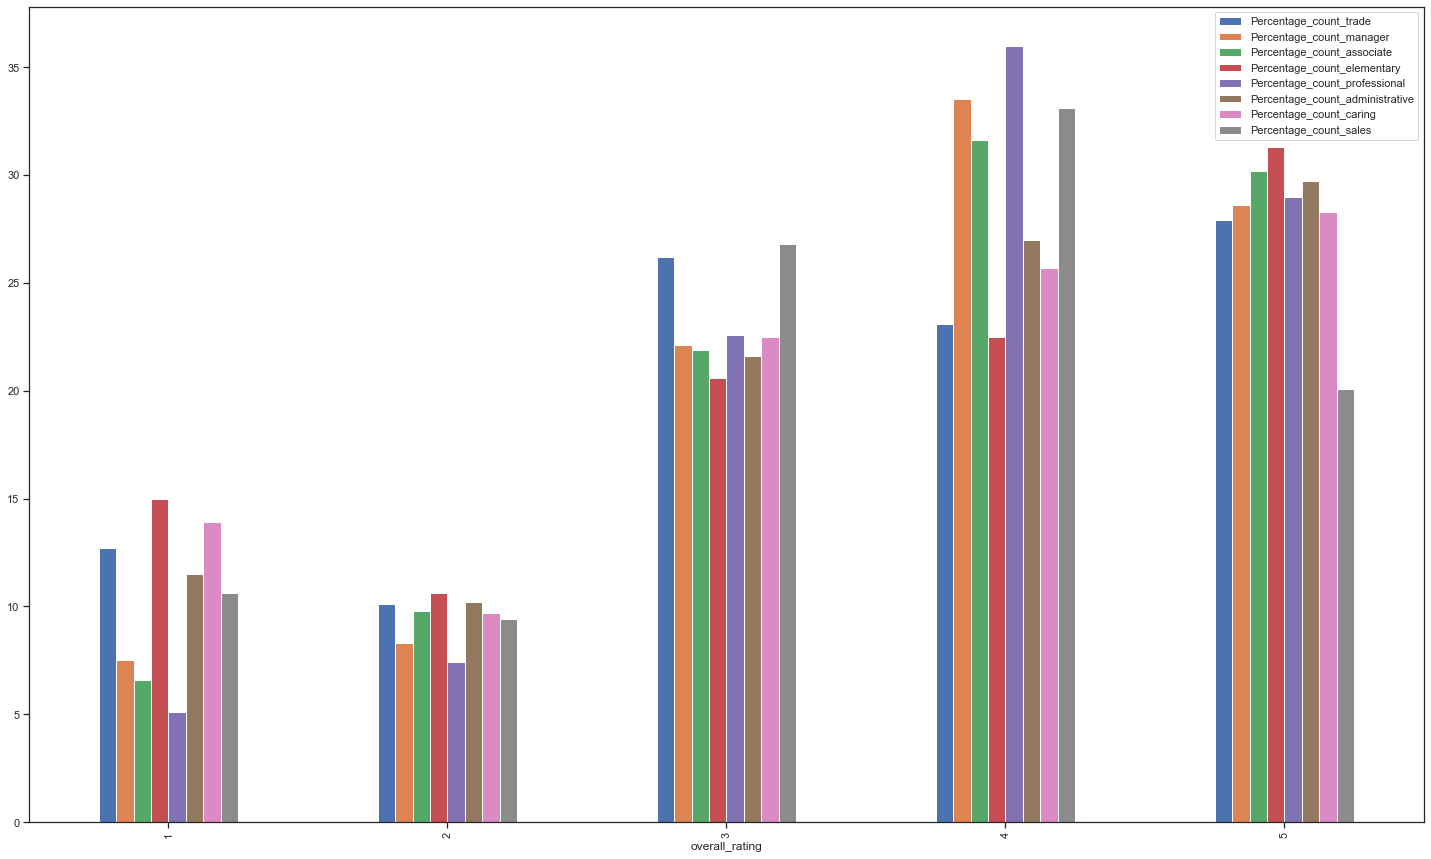

In [117]:
df.plot(x="overall_rating", y=["Percentage_count_trade", "Percentage_count_manager","Percentage_count_associate",
                              "Percentage_count_elementary","Percentage_count_professional","Percentage_count_administrative",
                              "Percentage_count_caring","Percentage_count_sales"], kind="bar", figsize=(25, 15))

# Finding the overall rating mean and diversity inclusion rating mean per job sector 

In [118]:
mean_overall_rating = [mean(filtered_trade.overall_rating),mean(filtered_manager.overall_rating), 
                       mean(filtered_operatives.overall_rating), mean(filtered_associate.overall_rating), 
                      mean(filtered_elementary.overall_rating), mean(filtered_professional.overall_rating), 
                      mean(filtered_administrative.overall_rating), mean(filtered_caring.overall_rating),
                      mean(filtered_sales.overall_rating)]

genderpaygap_sector['Overall_job_satisfation_mean'] = mean_overall_rating
genderpaygap_sector


,Description,Code,Gender pay gap mean,Color code,Overall_job_satisfation_mean
64,Skilled trades occupations,5.0,23.2,1,3.433071
59,"Managers, directors and senior officials",1.0,23.1,1,3.675046
67,"Process, plant and machine operatives",8.0,18.5,1,3.234043
62,Associate professional and technical occupations,3.0,15.6,1,3.688694
68,Elementary occupations,9.0,14.4,1,3.446483
61,Professional occupations,2.0,13.6,1,3.764411
63,Administrative and secretarial occupations,4.0,9.9,1,3.531027
65,"Caring, leisure and other service occupations",6.0,8.6,1,3.448385
66,Sales and customer service occupations,7.0,7.9,1,3.426153


In [119]:
#Dropping the Nan values in Diversity inclusion rating

filtered_trade_div= filtered_trade.dropna(subset=['diversity_inclusion'])
filtered_manager_div= filtered_manager.dropna(subset=['diversity_inclusion'])
filtered_associate_div= filtered_associate.dropna(subset=['diversity_inclusion'])
filtered_operatives_div= filtered_operatives.dropna(subset=['diversity_inclusion'])
filtered_elementary_div= filtered_elementary.dropna(subset=['diversity_inclusion'])
filtered_professional_div= filtered_professional.dropna(subset=['diversity_inclusion'])
filtered_caring_div= filtered_caring.dropna(subset=['diversity_inclusion'])
filtered_administrative_div= filtered_administrative.dropna(subset=['diversity_inclusion'])
filtered_sales_div= filtered_sales.dropna(subset=['diversity_inclusion'])

In [120]:
#Calculating the Diversity inclusion rating mean per job sector 

mean_diversity_inclusion = [mean(filtered_trade_div.diversity_inclusion),mean(filtered_manager_div.diversity_inclusion), 
                       mean(filtered_operatives_div.diversity_inclusion), mean(filtered_associate_div.diversity_inclusion), 
                      mean(filtered_elementary_div.diversity_inclusion), mean(filtered_professional_div.diversity_inclusion), 
                      mean(filtered_administrative_div.diversity_inclusion), mean(filtered_caring_div.diversity_inclusion),
                      mean(filtered_sales_div.diversity_inclusion)]


In [121]:
#Adding Diversity inclusion rating mean column per job sector
genderpaygap_sector['Diversity_inclusion_rating_mean'] = mean_diversity_inclusion
genderpaygap_sector

,Description,Code,Gender pay gap mean,Color code,Overall_job_satisfation_mean,Diversity_inclusion_rating_mean
64,Skilled trades occupations,5.0,23.2,1,3.433071,3.607064
59,"Managers, directors and senior officials",1.0,23.1,1,3.675046,3.875406
67,"Process, plant and machine operatives",8.0,18.5,1,3.234043,3.625000
62,Associate professional and technical occupations,3.0,15.6,1,3.688694,3.911891
68,Elementary occupations,9.0,14.4,1,3.446483,3.671875
61,Professional occupations,2.0,13.6,1,3.764411,4.015011
63,Administrative and secretarial occupations,4.0,9.9,1,3.531027,3.796296
65,"Caring, leisure and other service occupations",6.0,8.6,1,3.448385,3.700680
66,Sales and customer service occupations,7.0,7.9,1,3.426153,3.846602


# Analysis 2: Overall job satisfaction and diversity inclusion rating as the gender pay gap rises


<AxesSubplot:xlabel='Gender pay gap mean'>

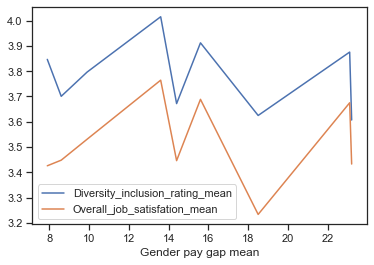

In [122]:
genderpaygap_sector.plot(x='Gender pay gap mean', y=['Diversity_inclusion_rating_mean', 'Overall_job_satisfation_mean'])

# Analysis 3: Correlation between the variables

In [131]:
#Corelation between gender pay gap and overall job satisfaction
col1_o = genderpaygap_sector['Overall_job_satisfation_mean']
col2_o = genderpaygap_sector['Gender pay gap mean']
corr_o = col1_o.corr(col2_o)
corr_o

#Correlation between gender pay gap and diversity inclusion at work
col1 = genderpaygap_sector['Diversity_inclusion_rating_mean']
col2 = genderpaygap_sector['Gender pay gap mean']
corr = col1.corr(col2)
corr

data = [{'Overall_general_rating': corr_o, 'Diversity_inclusion_rating': corr}]
  
# Creates DataFrame.
df = pd.DataFrame(data,  index =['Gender_pay_gap_mean'])

df.columns.name = 'Correlation between the gender pay gap and job satisfaction'
display(df)
  
  
    


Correlation between the gender pay gap and job satisfaction,Overall_general_rating,Diversity_inclusion_rating
Gender_pay_gap_mean,0.053969,-0.219289


In [ ]:
# Results are inconclusive